# Part5 기초적인 자료분석 방법
## 35장 가정 검토

### 1) 자료가 정규분포를 하는가?

대부분의 통계분석은 자료의 분포 가정을 하고 있다. 분포 가정들 중 가장 일반적인 형태는 정규성 가정. 

**정규성 확인 방법**
   * 점 그림(작은 표본의 경우)이나 히스토그램, 또는 줄기와 잎 그림이나 상자의 수염 그림 당을 사용해 자료의 경험적 빈도분포 확인
   
  > - 이 형태가 종 모양이고 좌우대칭이면 자료가 근사적으로 정규분포에 따른다고 봄
  > - 상자와 수염 그림의 경우, 만일 자료가 정규분포를 한다면 중앙값은 제1사분위수와 제3사분위수를 표시하는 상자의 중앙에 위치해야 하며, 또한 위와 아래로 뻗은 수염의 길이도 같아야 함
   
   
   * (통계 소프트웨어를 사용해서) **정규그림(normal plot)**
   
   - 정규그림 : 자료 값들을 x-축으로, 자료의 누적분표에 대한 표준전규편차를 y-축으로 사용해 그린 그림
   
   > - 자료가 정규분포를 하는 경우 직선 형태의 점들이 찍히지만 정규성이 만족되지 않는 경우 점들이 곡선 형태가 됨
   
   
- 이들 두 방법 모두 주관적인 방법들이긴 하지만, 표본 수가 작은 경우에는 정규그림을 사용하는 것이 더 효과적임.
   
- 통계 소프트웨어를 사용해 자료의 정규성 여부를 보다 객관적으로 평가할 수 있는 방법 
 - **콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test), 샤피로-윌크 검정(Shapiro-Wilk test)**, 그리고 **앤더슨-달링 검정(Anderson-Darling test)** 등이 있음

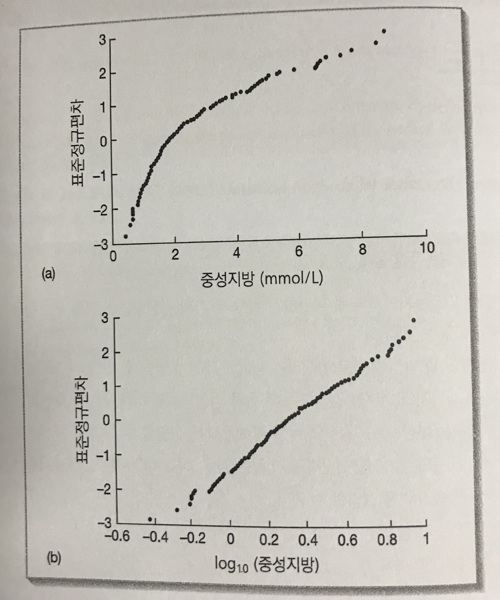

In [1]:
from PIL import Image
Image.open('imgj_1.jpg').resize((500,600))

- (a) 19장에서 사용된 중성지방 수준 원자료에 대한 정규그림.

   원자료는 치우친 형태, 따라서 정규그림도 확실히 곡선적인 형태를 보이고 있다  
   
   
- (b) 로그(중성지방 수준)에 대한 정규그림.

   근사적으로 직선의 형태를 보이고 있으며, 따라서 로그변환을 통해 자료의 치우침이 성공적으로 교정되어 좌우대칭 형태로 바뀌었음을 알 수 있다

### 2) (두 집단 또는 여러 집단의) 분산은 동일한가?
_두 집단의 모형균을 비교하기 위해서는 __t-검정__ 을, 세 집단 이상의 모평균을 비교하기 위해서는 __ANOVA__ 를 사용한다고 설명한 바 있음. 이 분석방법들은 기본적으로 각 집단 내 관찰값들의 변동량이 서로 같다. 즉, 분산의 크기가 같다는 가정 필요

- 단순회귀나 다중회귀 그리고 변량효과 모형들은 _잔차(residuals)_ 들의 분산이 서로 동일하다는 가정을 필요로 함


**등분산(homogeneity of variance)** 또는 **등분산성(homoscedasticity)** 이라 함. 

> 분산들이 서로 같지 않다는 것 : **이분산(heterogeneity of variance)** 또는 **이분산성(heteroscedasticity)** 이라 함

**등분산 가정 검토 방법**
- 르빈 검정(Levene test) 
  - 두 개 또는 그 이상의 집단들 간 등분산성을 검정하기 위한 방법
  - 이 검정의 귀무가설은 집단들 간 분산이 서로 같다
  - 자료의 정규성 가정에 크게 영향을 받지 않음
   
- 바틀렛 검정(Bartlett test) 
  - 세 집단 이상의 분산들을 비교하기 위한 방법
  - 자료의 정규성 가정이 위반되면 강건하지 않음

- F-검정 
  - 각 집단 별 자료가 근사적으로 정규분포를 하는 경우에, 두 집단의 분산을 비교하기 위해 실시할 수 있음
  - 정규성 가정이 만족되지 않는 것에 강건하지 않음

> 집단 별 분산 추정값 :  $s_1^2$과 $s_2^2$ 일반적으로는 두 분산 중 큰 값을 $s_1^2$ 으로 표시


#### 1. 해당 연구에 관한 귀무가설과 대립가설을 설정
$H_0$ : 두 집단의 모분산은 같다 (즉, $\sigma_1^2 = \sigma_2^2$)

$H_1$ : 두 집단의 모분산은 같지 않다. (즉, $\sigma_1^2 \neq \sigma_2^2$)
#### 2. 두 표본으로부터 자료를 수집하고 적절한 통계량들을 계산
자료로부터 검정에 필요한 통계량들($n_1$, $n_2$, $s_1^2$, $s_2^2$) 계산
#### 3. $H_0$ 에 해당하는 검정통계량 값을 계산
> $\displaystyle F = \frac {s_1^2}{s_2^2}$
> -  F-값 분자 부분의 $s_1^2$으로는 두 표본분산 값 중 큰 값을 사용
> -  F-통계량은 분자의 자유도가 $n_1$ - 1이고 분모의 자유도가 $n_2$ - 1인 F-분포를 따름 

#### 4. 검정통계량 값을 알려진 확률분포의 값과 비교
#### 5. P-value를 해석하고 결론을 내림


### 3) 가정이 만족되지 않는 경우에는 어떻게 해야 하나?
- 분석결과가 강건하지 않을 것이라는 점을 감안하면서 그대로 분석을 진행 
- 만일 이 옵션을 선택한다면 무조건 적절한 분석은 아니기 때문에 결과 해석 시 주의
- 원자료 분석에서 요구되는 가정이 만족되도록 적절하게 변환
  - 회귀분석에서는 일반적으로 x 변수 변환
- 만일 가능하다면 (정규성과 같은) 자료의 분포에 대한 가정을 하지 않는 **비모수 검정(non-parametric test)** 방법을 사용
- 비모수 회귀분석 (non-parametric regres-sion analysis)을 실시할 수도 있다. 
  - 이 방법은 주된 목적은 (모수를 추정하려는 것보다는) 설명변수들과 종속변수 간의 함수 형태를 추정하고자 하는 것으로, 
  - 비모수 회귀를 통해 모형의 선형성 가정은 완화시키면서 자료를 매끄러운 곡선으로 적합시킴. 
  - 모수적인 모형을 명시하지 않고도 자료의 경향성을 시각적으로 파악할 수 있게 됨

### 4) 민감도 분석(sensitivity analysis)
**강건(robust)**한 분석
- 만일 가정이 만족되지 않아도 *P-value*나 검정력 또는 모수 추정값들이 크게 영향을 받지 않음
- 가정들이 만족되지 않아도 해당 연구로부터 얻어진 결론들은 맞을 가능성이 높지만
- 강건하지 않은 분석은 잘못된 결론이 내려질 가능성이 높다
- 모든 분석을 수행한 후에는 항상 얻어진 결과들이 강건한지의 여부에 대해 검토하는, 하나 이상의 **민감도 분석**을 실시하는 것이 현명함

**민감도 분석** 
-  자료에 대한 분석 방법을 약간 달리 한 후에 모수 추정값이나 결론이 어느 정도나 달라지는지를 비교하는 것
  > ex) 이상값으로 의심되는 일부 값들을 제외하고 분석해보거나, 가정들을 변화시켜 보거나, 또는 다른 분석 방법을 사용해보는 것 등)

- 연구결과를 제시할 때 민감도 분석결과는 민감도 분석결과라고 분명하게 명시해줘야 함

- 회귀분석에서 연속형 설명변수와 종속변수 간의 선형성을 가정하는 대신, 이 설명 변수를 범주화 해서 새로운 형태의 명목형 설명변수를 바꾼 후 회귀모형을 다시 적합

   - 설명변수를 두 개이 범주로 범주화 하고자 하면 0과 1로 입력된 하나의 두 범주 변수를 사용하고, 두 개 이상의 범주로 범주화 하고자 하면 가변수들을 활용함

- 모수적 분석을 실시한 경우에는 이에 대응하는 비모수적 분석도 실시

> ex) 독립표본 t-검정실시하는 경우  맨-휘트니 U-검정도 실시

- 다중 회귀분석에서 영향값들이 파악된 경우에는 이 값들을 제외하고 다시 분석을 해봄
- 모든 연구들의 자료를 사용해 메타분석을 수행하는 경우
  - 연구의 질이 낮은 연구들은 제외하고 메타분석을 해봄
  - 메타분석 시, 계산된 결합효과(pooled effect)가 연구결과들을 결합하기 위해 사용된 통계 방법에 대해 얼마나 강건한지 평가하기 위해 고정효과 모형(fixed-effects model)과 변량 효과 모형(random-effects model)을 둘 다 적용해봄

- 분석결과가 결측값 처리 방법에 따라 얼마나 변하는지 평가해보기 위해 다양한 결측값 처리방법들을 사용해봄

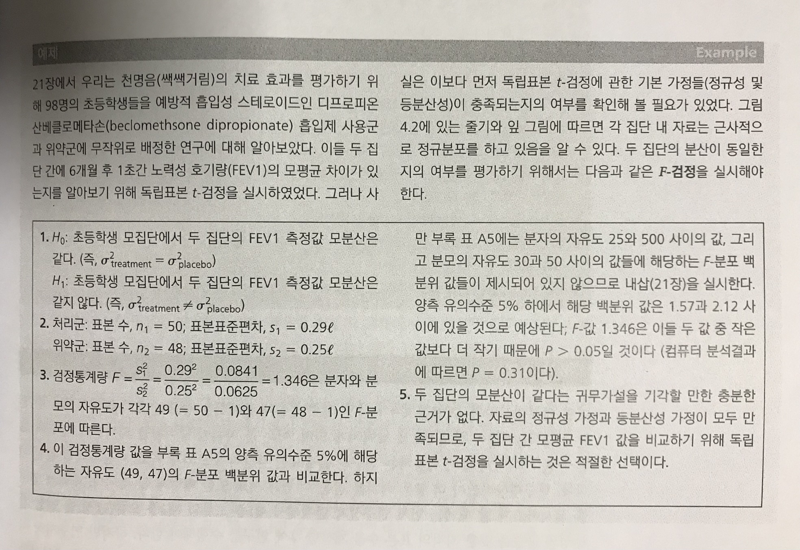

In [2]:
from PIL import Image
Image.open('imgj_2.jpg').resize((800,550))